The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
74
Delta:  0.1423076923076923 Multiple of ITL 1.0 Modified delta 0.1423076923076923
Run:  0
Delta:  0.20192307692307693 Multiple of ITL 1.4285714285714286 Modified delta 0.20192307692307693
Run:  0
Delta:  0.26346153846153847 Multiple of ITL 1.8571428571428572 Modified delta 0.26346153846153847
Run:  0
Delta:  0.325 Multiple of ITL 2.2857142857142856 Modified delta 0.325
Run:  0
Delta:  0.38461538461538464 Multiple of ITL 2.7142857142857144 Modified delta 0.38461538461538464
Run:  0
Delta:  0.4461538461538462 Multiple of ITL 3.142857142857143 Modified delta 0.4461538461538462
Run:  0
Delta:  0.5076923076923077 Multiple of ITL 3.571428571428571 Modified delta 0.5076923076923077
Run:  0
Delta:  0.5692307692307692 Multiple of ITL 4.0 Modified delta 0.5692307692307692
Run:  0
Delta:  0.6288461538461538 Multiple of ITL 4.428571428571429 Modified delta 0.6288461538461538
Run:  0
Delta:  0.6903846153846154

Text(0.5, 0, '$\\delta=n/p$')

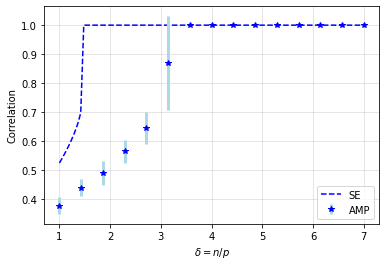

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  6 14:56:53 2023

@author: pp423
"""
%load_ext autoreload
%autoreload 2

import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt

from ipynb.fs.full.amp_qgt import sub_amp_bayes, create_beta, Yspatial_to_Ytilde
from ipynb.fs.full.amp_qgt import Xspatial_to_Xtilde, CreateSpatialCouplingX, DefectCalc
from ipynb.fs.full.amp_qgt import create_W, W_to_Wtilde, sc_amp_bayes, create_SC_matrix, Xsc_to_Xsctilde
from ipynb.fs.full.se_qgt import state_ev_iid_disc, state_ev_iid_disc_sub, mmse_new
from numpy.random import binomial


theta = 0.8
#number of subjects
p = 520
alpha = 0.5
# defective chance
noise = 0
Gamma = 1
WrcTrue = True
w = 1
W  = create_W(Gamma, w, alpha)
Wtilde = W_to_Wtilde(W, alpha)
run_no = 15
ITL = int(2*(1-theta)/theta*p**theta)
print(ITL)
delta = 2

delta_array = np.linspace(1, 7, num=15)

se_delta_array = np.linspace(1, 7, num=101)

nc_array_av = []
nc_array_std = []
se_nc_array = []


for delta in delta_array:
    #defective chance
    nu = p**(theta-1)
    
    #number of tests
    n = int(ITL*delta)

    mse_runs = []
    nc_runs = []
    delta_hat = n/p*Gamma/(Gamma + w - 1)
    print("Delta: ", n/p, "Multiple of ITL", delta, "Modified delta", delta_hat)
    #IID
    for run in range(run_no):
        beta_0 = create_beta(nu, p)
    
        t = 100

        if(run % 25 ==0):
            print("Run: ", run)
            
        #X = CreateSpatialCouplingX(Gamma, w, n, p, alpha, WrcTrue)
        X = create_SC_matrix(W, int(p/(Gamma)), alpha, delta_hat)
        y = np.dot(X, beta_0)
        
        #AMP
        #X_tilde = Xspatial_to_Xtilde(X, Gamma, w, n, p, alpha, WrcTrue)
        X_tilde = Xsc_to_Xsctilde(X, W, alpha)
        
        defect_no = DefectCalc(beta_0, Gamma, p)
        
        #y_tilde = Yspatial_to_Ytilde(y, Gamma, w, n, p, alpha, WrcTrue, defect_no)
        y_tilde = np.dot(X_tilde, beta_0)
        #X_tilde_T = np.transpose(X_tilde)
        phi, beta, mse_list = sc_amp_bayes(Wtilde, X_tilde, y_tilde, beta_0, nu, delta_hat,t)
        norm_correl = (np.dot(beta, beta_0)/(np.linalg.norm(beta)*np.linalg.norm(beta_0)))**2
        #print(beta, beta_0, norm_correl, beta,np.linalg.norm(beta), np.linalg.norm(beta_0),np.dot(beta, beta_0))
        nc_runs.append(norm_correl)
        
    nc_array_av.append(np.average(nc_runs))
    #print (np.average(nc_runs), nc_runs)
    nc_array_std.append(np.std(nc_runs))
    
for delta in se_delta_array:    
    #IID STATE EVOLUTION
    tau, mse_pred, nc_pred, _ = state_ev_iid_disc_sub(delta, t, nu, p,  theta)
    se_nc_array.append(nc_pred)
    
    
plt.figure()
plt.plot(se_delta_array, se_nc_array, label=r'SE', color = 'blue', linestyle = 'dashed')
plt.errorbar(delta_array, nc_array_av, yerr=nc_array_std, label =r"AMP", fmt='*', color='blue',ecolor='lightblue', elinewidth=3, capsize=0)
plt.grid(alpha=0.4)
plt.legend()
plt.ylabel('Correlation')
plt.xlabel(r'$\delta=n/p$')

